In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
isInKaggle=False
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

if isInKaggle:
    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    for dirname, _, filenames in os.walk('../data/titanic'):
        for filename in filenames:
            print(os.path.join(dirname, filename)) 
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/titanic\gender_submission.csv
../data/titanic\test.csv
../data/titanic\train.csv


In [3]:
#Root path
ROOT = "../data/titanic/"
if isInKaggle:
    ROOT = "/kaggle/input/titanic/"

> # **Starting the descriptive analysis train.csv**

In [4]:
import pandas as pd
data = pd.read_csv(ROOT+"train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Descriptive Statistics**


[Here](https://www.datavedas.com/descriptive-statistics-in-python/) is a googd reference.

[Here](https://pandas.pydata.org/pandas-docs/stable/reference/) you have the documentation regarding `pandas` package.

In [6]:
#frequency distributions
#pd.value_counts(data["Survived"]).to_frame(name='Frequency').rename_axis('Survived', 1).sort_index()
#data.groupby('Survived').describe()
#data.Survived.value_counts()
print(data.Pclass.value_counts().reset_index(name='Frequency').rename(columns={'index':'Pclass'}))
print(data.Embarked.value_counts().reset_index(name='Frequency').rename(columns={'index':'Embarked'}))

   Pclass  Frequency
0       3        491
1       1        216
2       2        184
  Embarked  Frequency
0        S        644
1        C        168
2        Q         77


In [10]:
#Functions for studying the association between 'Survived' and the remaining Titanic ones
def qualiQualiVariablesAnalysis (varName1, varName2):
    SQ_tb = pd.crosstab(index=data[varName1], columns=data[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " + varName1 
    print("******** " + title + " ********")
    print(SQ_tb)
    Stacked = SQ_tb.plot(kind="bar",figsize=(8,8),stacked=False,title=title,fontsize=12)
    Stacked.set_ylabel("%",fontsize=12)
    Stacked.set_xlabel(varName1,fontsize=12)
    #return (SQ_tb)

def qualiQuantiVariablesAnalysis (varName1, varName2):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    print(data[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = data.boxplot(column=varName1,figsize=(8,8),vert=True, by=varName2)
    boxVarS.set_ylabel(varName1,fontsize=12)
    boxVarS.set_xlabel(varName2,fontsize=12)

#survivedPerQuali("Pclass")#pd.crosstab(index=data["Pclass"], columns=data["Survived"], normalize = "index")#, margins = True
#survivedPerQuanti("Age")


******** Age per Survived ********
            Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


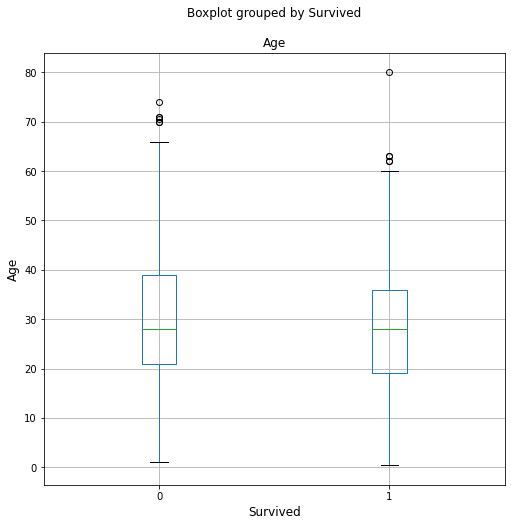

In [7]:
# data[["Age", "Survived"]].head()
# data[["Age", "Survived"]].groupby("Survived").describe()
qualiQuantiVariablesAnalysis("Age", "Survived")

In [8]:
types = data.dtypes
isQuali = (types=="object")
isQuali = isQuali[isQuali].index
isQuanti = (types!="object")
isQuanti = isQuanti[isQuanti].index
isQuanti = isQuanti.drop('Survived')
print("isQuali")
print(isQuali)
print("isQuanti")
print(isQuanti)

isQuali
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
isQuanti
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


**FIGURES & BIVARIATE TABLES**

=============== QUALITATIVE PREDICTORS ===============
******** Conditional Proportion: Survived per Name ********
Survived                                 0    1
Name                                           
Abbing, Mr. Anthony                    1.0  0.0
Abbott, Mr. Rossmore Edward            1.0  0.0
Abbott, Mrs. Stanton (Rosa Hunt)       0.0  1.0
Abelson, Mr. Samuel                    1.0  0.0
Abelson, Mrs. Samuel (Hannah Wizosky)  0.0  1.0
...                                    ...  ...
de Mulder, Mr. Theodore                0.0  1.0
de Pelsmaeker, Mr. Alfons              1.0  0.0
del Carlo, Mr. Sebastiano              1.0  0.0
van Billiard, Mr. Austin Blyler        1.0  0.0
van Melkebeke, Mr. Philemon            1.0  0.0

[891 rows x 2 columns]
******** Conditional Proportion: Survived per Sex ********
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908
******** Conditional Proportion: Survived per Ticket ********


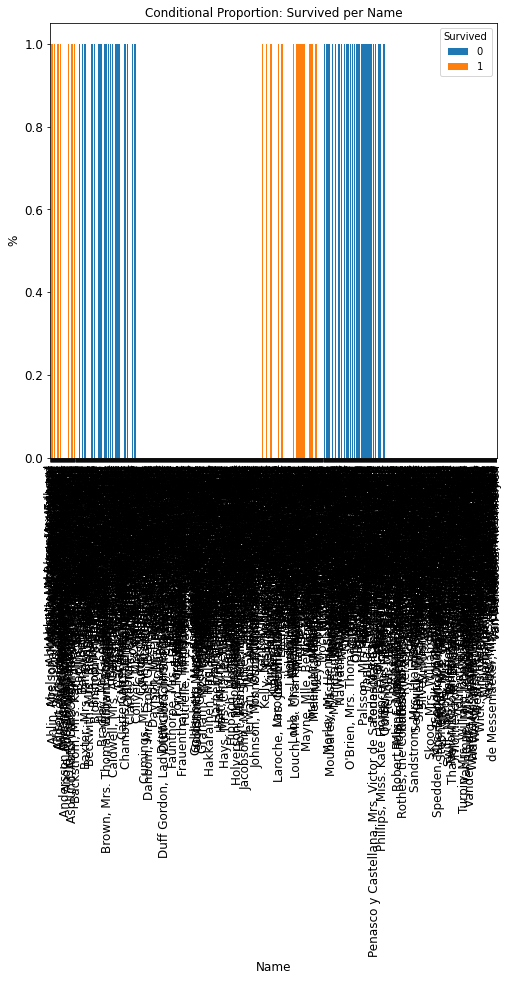

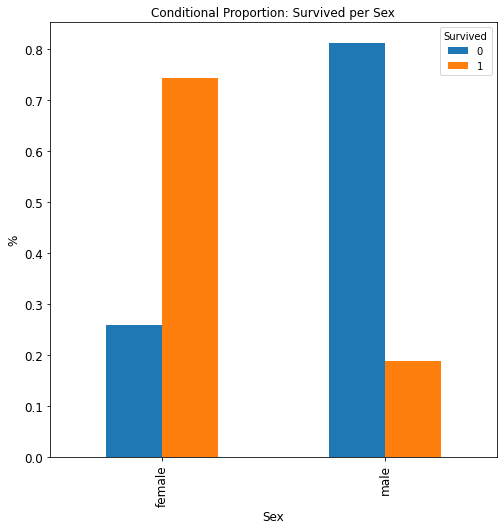

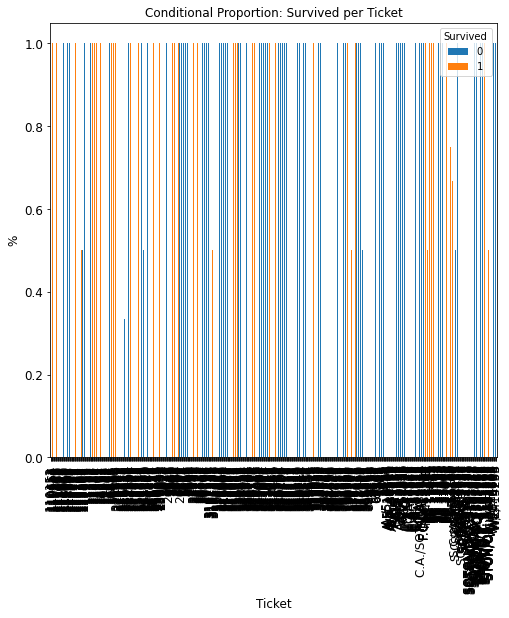

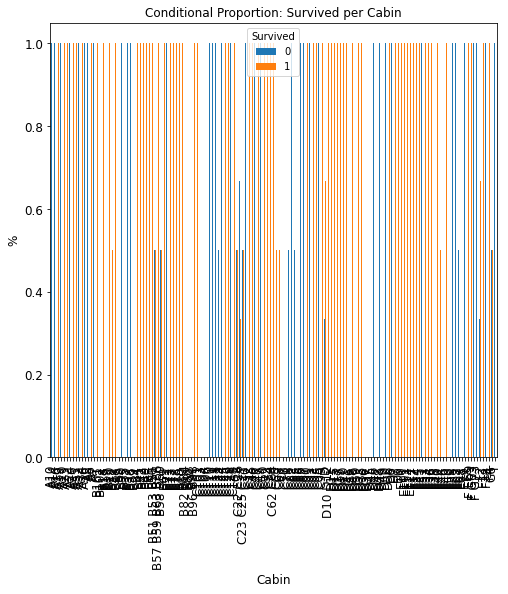

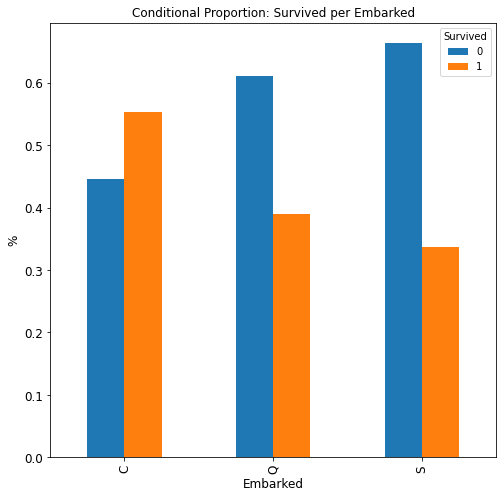

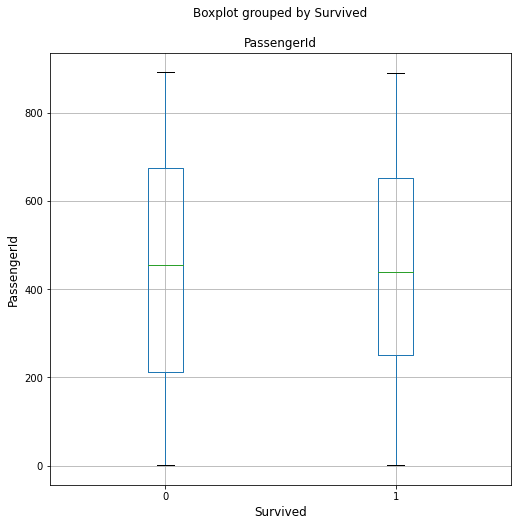

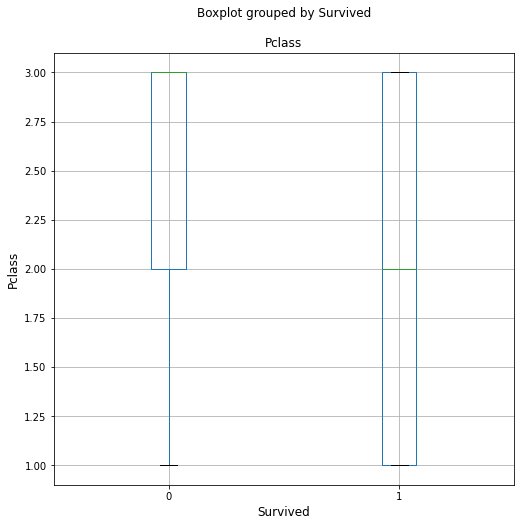

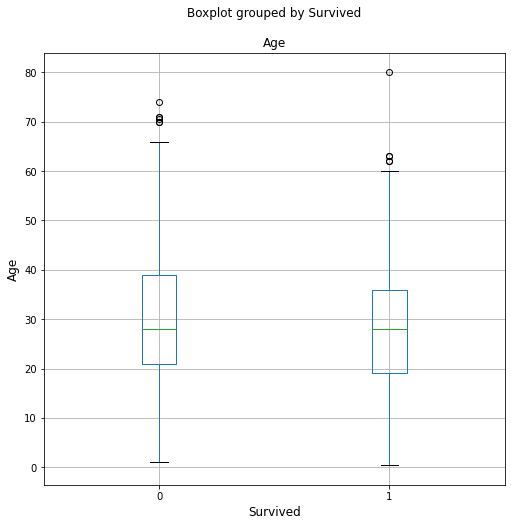

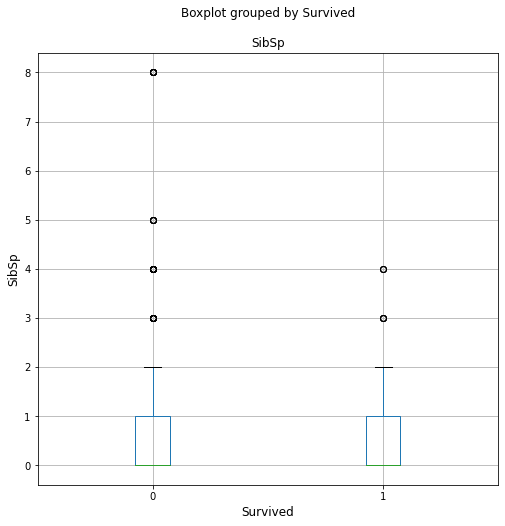

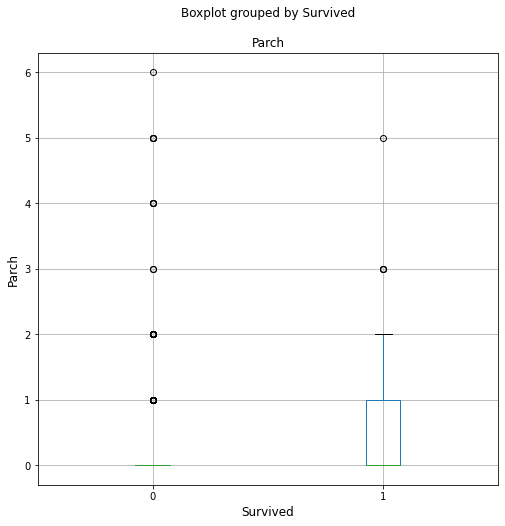

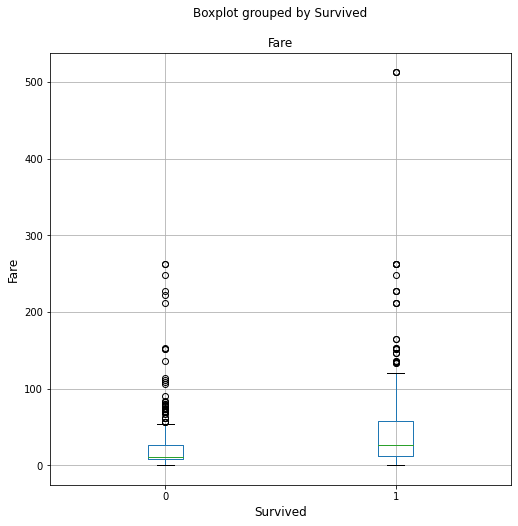

In [11]:
print("=============== QUALITATIVE PREDICTORS ===============")
for qualiVar in isQuali:
    qualiQualiVariablesAnalysis (qualiVar, "Survived")

print("=============== QUANTITATIVE PREDICTORS ===============")
for quantiVar in isQuanti:
    qualiQuantiVariablesAnalysis(quantiVar, "Survived")


AxesSubplot(0.125,0.125;0.775x0.755)


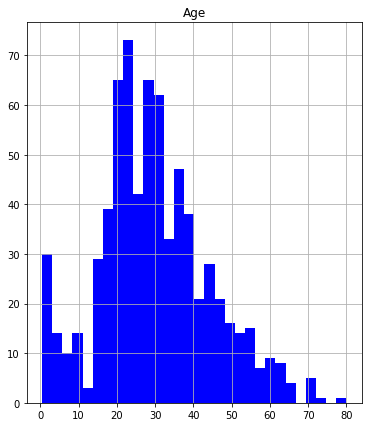

In [44]:
myHist = data.hist(column="Age",figsize=(6,7),color="blue",bins=round(len(data)**.5))#,range=(55,90))
print(myHist.max())
# data.